In [2]:
!python --version

Python 3.10.12


**Solution: **It appears that the issue is not caused by CVAT SDK, but rather by some nuances of how Colab works. Initially, the Pillow library is already loaded into the Python runtime. When you install CVAT SDK, it updates the version of Pillow that's installed on the disk, but the runtime still has the old version. This mismatch is what causes the error you see.

**To resolve this, all you should need is to restart the Python runtime after you install CVAT SDK (Runtime -> Restart runtime).**

**References**

 CVAT https://www.cvat.ai/

 Documentation https://opencv.github.io/cvat/docs/getting_started/

 https://github.com/opencv/cvat

Reference codes:
  


In [ ]:
# Show all outputs of a cell in a jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Annotating Datasets with CVAT


## Setup



**CVAT SDK **is a Python library. It provides you access to Python functions and objects that simplify server interaction and provide additional functionality like data validation and serialization.
https://opencv.github.io/cvat/docs/api_sdk/sdk/

SDK API includes several layers:

1. Low-level API with REST API wrappers. Located at cvat_sdk.api_client.

The low-level API is useful if you need to work directly with REST API, but want to have data validation and syntax assistance from your code editor. The code on this layer is autogenerated.


2. High-level API. Located at cvat_sdk.core.

This layer provides high-level APIs, allowing easier access to server operations. API includes Repositories and Entities. Repositories provide management operations for Entities. Entities represent objects on the server (e.g. projects, tasks, jobs etc) and simplify interaction with them. The key difference from the low-level API is that operations on this layer are not limited by a single server request per operation and encapsulate low-level request machinery behind a high-level object-oriented API.


3. PyTorch adapter. Located at cvat_sdk.pytorch.

This layer provides functionality that enables you to treat CVAT projects and tasks as PyTorch datasets.


4. Auto-annotation API. Located at cvat_sdk.auto_annotation.

This layer provides functionality that allows you to automatically annotate a CVAT dataset by running a custom function on your local machine. A function, in this context, is a Python object that implements a particular protocol defined by this layer. To avoid confusion with Python functions, auto-annotation functions will be referred to as “AA functions” in the following text.



A REST API (Representational State Transfer API) is a web service that adheres to the principles of REST, using standard HTTP methods to enable communication between software applications. It simplifies data retrieval, update, and other actions over the internet. In contrast, a server API, more generally known as an API, defines rules and protocols for software programs to interact with various components, such as servers or services. APIs facilitate seamless communication, enabling developers to integrate systems, create custom applications, and extend the functionality of software components across a wide range of applications, from web services to databases and hardware devices.







CVAT REST API (2.7.6 (2.0))
https://app.cvat.ai/api/docs/

In [3]:
#To install an official release of CVAT SDK
!pip install cvat-sdk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.5/715.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 42.8 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.1.0 which is incompatible.


In [4]:
#To use the PyTorch adapter, request the pytorch extra:
!pip install "cvat-sdk[pytorch]"

The low-level API supports 2 ways of authentication. CVAT supports 2 authentication options:

1) basic auth, with your username and password

2) token auth, with your API key

**Runtime -> Restart runtime**

In [1]:
#import package components

#For the low-level API:
import cvat_sdk.api_client

In [2]:
#For the high-level API:
import cvat_sdk
#or
#import cvat_sdk.core

In [3]:
#For the PyTorch adapter:
import cvat_sdk.pytorch
from cvat_sdk.auto_annotation.functions.torchvision_detection import create as create_torchvision

#High-level API

This layer provides high-level APIs, allowing easier access to server operations. API includes Repositories and Entities. Repositories provide management operations for Entities. Entities represent objects on the server (e.g. projects, tasks, jobs etc) and simplify interaction with them. The key difference from the low-level API is that operations on this layer are not limited by a single server request per operation and encapsulate low-level request machinery behind a high-level object-oriented API.

https://opencv.github.io/cvat/docs/api_sdk/sdk/highlevel-api/

In [ ]:
from cvat_sdk import make_client, models
from cvat_sdk.core.proxies.tasks import ResourceType, Task

In [ ]:
# Create a Client instance bound to a local server and authenticate using basic auth

#with make_client(host="localhost", credentials=('user', 'password')) as client:
with make_client(host="app.cvat.ai", credentials=('shanshan', 'PASSWORD HIDED')) as client:
    # Let's create a new task.

    # Fill in task parameters first.
    # Models are used the same way as in the layer 1.
    task_spec = {
        "name": "example task",
        "labels": [
            {
                "name": "car",
                "color": "#ff00ff",
                "attributes": [
                    {
                        "name": "a",
                        "mutable": True,
                        "input_type": "number",
                        "default_value": "5",
                        "values": ["4", "5", "6"],
                    }
                ],
            }
        ],
    }


    # Now we can create a task using a task repository method.
    # Repositories can be accessed as the Client class members.
    # In this case we use 2 local images as the task data.
    task = client.tasks.create_from_data(
        spec=task_spec,
        #resource_type=ResourceType.LOCAL,
        #resource_type="/content/drive/MyDrive/Colab Notebooks/AI learning group/Image Annotation_SW/Subset/",
        resource_type="/C:/Users/sw0525/Desktop/Image annotation/Dataset/Subset/",
        resources=['1.jpeg', '2.jpeg'],
    )

 # The returned task object is already up-to-date with its server counterpart.
    # Now we can access task fields. The fields are read-only and can be optional.
    # Let's check that we have 2 images in the task data.
    #assert task.size == 2

    # If an object is modified on the server, the local object is not updated automatically.
    # To reflect the latest changes, the local object needs to be fetch()-ed.
    task.fetch()

    # Let's obtain another task. Again, it can be done via the task repository.
    # Suppose we have already created the task earlier and know the task id.
    #task2 = client.tasks.retrieve(42)

    # The task object fields can be update()-d. Note that the set of fields that can be
    # modified can be different from what is available for reading.
    task.update({'name': 'my task'})

    # And the task can also be remove()-d from the server. The local copy will remain
    # untouched.
    #task.remove()

<Task: id=348629>

<Task: id=348629>

#PyTorch adapter

This layer provides functionality that enables you to treat CVAT projects and tasks as PyTorch datasets.

https://opencv.github.io/cvat/docs/api_sdk/sdk/pytorch-adapter/

In [ ]:
import torch
import torchvision.models

from cvat_sdk import make_client
from cvat_sdk.pytorch import ProjectVisionDataset, ExtractSingleLabelIndex
from cvat_sdk.pytorch import TaskVisionDataset

In [ ]:
# create a PyTorch model
model = torchvision.models.resnet34(
    weights=torchvision.models.ResNet34_Weights.IMAGENET1K_V1)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

ProjectVisionDataset and TaskVisionDataset, representing data & annotations contained in a CVAT project or task, respectively. Both of them are subclasses of the torch.utils.data.Dataset abstract class.

The interface of Dataset is essentially that of a sequence whose elements are samples from the dataset. In the case of TaskVisionDataset, each sample represents a frame from the task and its associated annotations. The order of the samples is the same as the order of frames in the task. Deleted frames are omitted.

In the case of ProjectVisionDataset, each sample is a sample from one of the project’s tasks, as if obtained from a TaskVisionDataset instance created for that task. The full sequence of samples is built by concatenating the sequences of samples from all included tasks in an unspecified order that is guaranteed to be consistent between executions.

The referenced project or task must contain image data. **Video data is currently not supported.**

In [ ]:
# log into the CVAT server
with make_client(host="app.cvat.ai", credentials=('shanshan', 'PASSWORD HIDED')) as client:

    # get the dataset comprising all tasks for the Validation subset of project (project ID)
    #dataset = ProjectVisionDataset(client, project_id=68172,
    #dataset = ProjectVisionDataset(client, 123)
        #include_subsets=['Validation'],
    dataset = TaskVisionDataset(client, 342838,
        # use transforms that fit our neural network
        transform=torchvision.models.ResNet34_Weights.IMAGENET1K_V1.transforms(),
        target_transform=ExtractSingleLabelIndex())

    # print the number of images in the dataset (in other words, the number of frames
    # in the included tasks)
    print(len(dataset))


100


In [ ]:
# log into the CVAT server
#with make_client(host="app.cvat.ai", credentials=('shanshan', 'PASSWORD HIDED')) as client:
#    dataset = TaskVisionDataset(client, 342838,
#        transform=torchvision.models.ResNet34_Weights.IMAGENET1K_V1.transforms(),
#        target_transform=ExtractSingleLabelIndex())

    # get a sample from the dataset
#    image, target = dataset[0]

#    # evaluate the network on the sample and compare the output to the target
#    output = model(image)
#    if torch.equal(output, target):
#        print("correct prediction")
#    else:
#        print("incorrect prediction")

#Auto-annotation API

**A typical AA function (auto-annotation functions) will be based on a machine learning model and consist of the following basic elements:**

1. Code to load the ML model.

2. A specification describing the annotations that the AA function can produce.

3. Code to convert data from CVAT to a format the ML model can understand.

4. Code to run the ML model.

5. Code to convert resulting annotations to a format CVAT can understand.


**The layer can be divided into several parts:**

1) The interface, containing the protocol that an AA function must implement.

2) The driver, containing functionality to annotate a CVAT dataset using an AA function.

3) The predefined AA function based on Ultralytics YOLOv8n.

In [4]:
from typing import List
import PIL.Image

import torchvision.models

from cvat_sdk import make_client
import cvat_sdk.models as models
import cvat_sdk.auto_annotation as cvataa

**Auto-annotation interface**

**Currently, the only type of AA function supported by this layer is the detection function.**

**A detection function must have two attributes, spec and detect.**

1) spec must contain the AA function’s specification, which is an instance of DetectionFunctionSpec.

2) DetectionFunctionSpec must be initialized with a sequence of PatchedLabelRequest objects that represent the labels that the AA function knows about.


**detect must be a function/method accepting two parameters:**

1) context (DetectionFunctionContext). Contains information about the current image. Currently DetectionFunctionContext only contains a single field, frame_name, which contains the file name of the frame on the CVAT server.

2) image (PIL.Image.Image). Contains image data.


https://github.com/opencv/cvat/blob/develop/cvat-sdk/cvat_sdk/auto_annotation/functions/torchvision_detection.py

In [5]:
class TorchvisionDetectionFunction:
    def __init__(self, model_name: str, weights_name: str, **kwargs) -> None:
        # load the ML model
        weights_enum = torchvision.models.get_model_weights(model_name)
        self._weights = weights_enum[weights_name]
        self._transforms = self._weights.transforms()
        self._model = torchvision.models.get_model(model_name, weights=self._weights, **kwargs)
        self._model.eval()

    @property
    def spec(self) -> cvataa.DetectionFunctionSpec:
        # describe the annotations
        return cvataa.DetectionFunctionSpec(
            labels=[
                cvataa.label_spec(cat, i)
                for i, cat in enumerate(self._weights.meta['categories'])
            ]
        )

    def detect(self, context, image: PIL.Image.Image) -> List[models.LabeledShapeRequest]:
        # convert the input into a form the model can understand
        transformed_image = [self._transforms(image)]

        # run the ML model
        results = self._model(transformed_image)

        # convert the results into a form CVAT can understand
        return [
            cvataa.rectangle(label.item(), [x.item() for x in box])
            for result in results
            for box, label in zip(result['boxes'], result['labels'])
        ]

The CVAT API model types used in the AA function protocol are somewhat unwieldy to work with, so it’s recommented to use the helper factory functions provided by this layer. These helpers instantiate an object of their corresponding model type, passing their arguments to the model constructor and sometimes setting some attributes to fixed values.

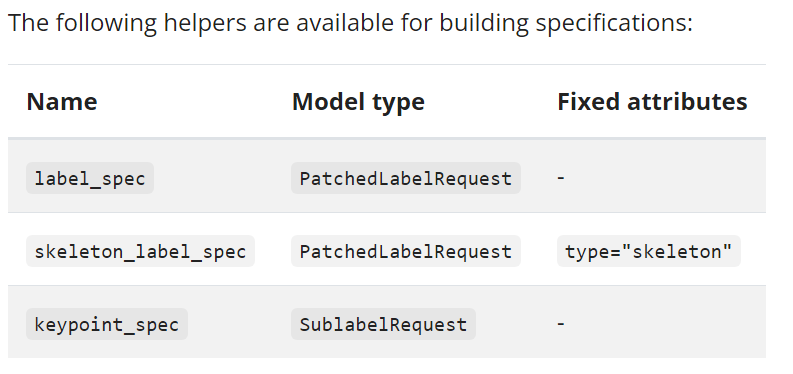

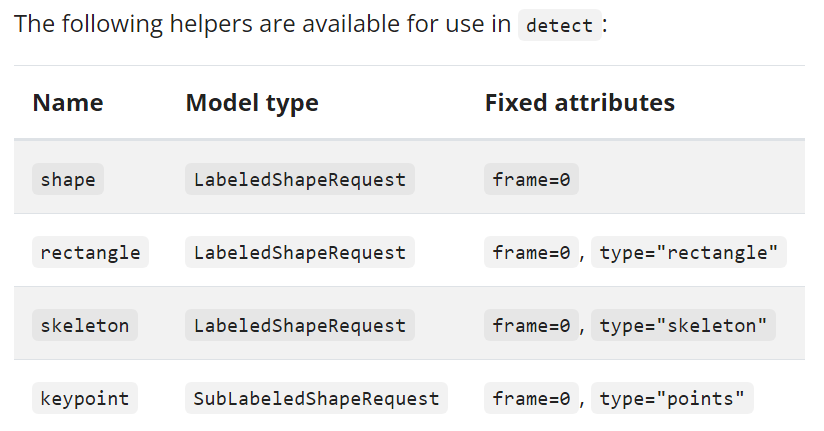

If a detection function declares a label that has no matching label in the task, then by default, BadFunctionError is raised, and auto-annotation is aborted. If you use **allow_unmatched_label=True**, then such labels will be ignored, and any shapes referring to them will be dropped. Same logic applies to sub-label IDs.

annotate_task will raise a BadFunctionError exception if it detects that the function violated the AA function protocol.


The create function accepts the following parameters:

model_name (str) - the name of the model, such as fasterrcnn_resnet50_fpn_v2. This parameter is required.

weights_name (str) - the name of a weights enum value for the model, such as COCO_V1. Defaults to DEFAULT.

The score_thresh=float:0.7 parameter is used to specify the threshold for object detection confidence scores. In this case, it's setting the confidence score threshold to 0.7, meaning that only object detections with a confidence score greater than or equal to 0.7 will be included in the results of the auto-annotation process. Objects with lower confidence scores will be filtered out.

A higher threshold makes the detection more conservative, and it will only consider objects with higher confidence as valid detections.

Conversely, a smaller value for box_score_thresh will include bounding boxes with lower confidence scores, making the detection more permissive and potentially capturing more objects, even those with lower confidence scores. However, this may also lead to including false positives.

In [8]:
# log into the CVAT server
with make_client(host='app.cvat.ai', credentials=("shanshan", "PASSWORD HIDED")) as client:
    # annotate task (task ID) using Faster R-CNN
    #cvataa.annotate_task(client, 342838,
    #    TorchvisionDetectionFunction("fasterrcnn_resnet50_fpn_v2", "DEFAULT", box_score_thresh=0.5),
    #)

      cvataa.annotate_task(client,348707,
        TorchvisionDetectionFunction("fasterrcnn_resnet50_fpn_v2", "DEFAULT", box_score_thresh=0.5),
    )

#In torchvision, "fasterrcnn_resnet50_fpn_v2" corresponds to
#the Faster R-CNN model with a ResNet-50 backbone and a feature pyramid network (FPN).

#################################################
###!!!!BadFunctionError: label 'person' is not in dataset >88

#https://pytorch.org/vision/stable/index.html
#https://pytorch.org/vision/stable/models.html#object-detection-instance-segmentation-and-person-keypoint-detection
#RetinaNet_ResNet50_FPN

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth
100%|██████████| 167M/167M [00:03<00:00, 55.4MB/s]


#Command line interface (CLI)

Overview of functionality:

Create a new task (supports name, bug tracker, project, labels JSON, local/share/remote files)

Delete tasks (supports deleting a list of task IDs)

List all tasks (supports basic CSV or JSON output)

Download JPEG frames (supports a list of frame IDs)

Dump annotations (supports all formats via format string)

Upload annotations for a task in the specified format (e.g. ‘YOLO ZIP 1.0’)

Export and download a whole task

Import a task

https://opencv.github.io/cvat/docs/api_sdk/cli/

https://www.cvat.ai/post/an-introduction-to-automated-data-annotation-with-cvat-ai-cli

The score_thresh=float:0.7 parameter is used to specify the threshold for object detection confidence scores. In this case, it's setting the confidence score threshold to 0.7, meaning that only object detections with a confidence score greater than or equal to 0.7 will be included in the results of the auto-annotation process. Objects with lower confidence scores will be filtered out.